# Behavioral analyses

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import chiCa
from fit_psychometric import fit_psychometric
from utils import *

#workaround since it gets removed from the path whenever the kernel is restarted
# import sys
# sys.path.insert(0, '/Users/gabriel/lib/')

%matplotlib widget
plt.rcParams['savefig.format'] = 'pdf'

## Get mat files, convert them to h5 format, and store the paths to those files

In [4]:
#Get mat paths, convert them to h5 if necessary, and store h5 paths in a dictionary
# animal_ids = ['GRB001', 'GRB002', 'GRB003', 'GRB004', 'GRB005', 'GRB006', 'GRB007', 'GRB008', 'GRB009', 'GRB015', 'GRB016', 'GRB017', 'GRB018']
animal_ids = ['GRB006']
mat_paths_all_animals = {animal_id: get_file_names(animal_id, 'chipmunk', '*.mat') for animal_id in animal_ids}
h5paths = [chiCa.convert_specified_behavior_sessions(matpaths, overwrite = False) for animalID, matpaths in mat_paths_all_animals.items()]
paths_all_animals = {animal_id: get_file_names(animal_id, 'chipmunk', '*.h5') for animal_id in animal_ids}

/opt/conda/lib/python3.9/site-packages/chiCa/chipmunk_analysis_tools.py:113: UserWarning: Found multisensory trials, assumed synchronous condition
  warnings.warn('Found multisensory trials, assumed synchronous condition')
/opt/conda/lib/python3.9/site-packages/pandas/core/generic.py:2703: PerformanceWarning: 
your performance may suffer as PyTables will pickle object types that it cannot
map directly to c-types [inferred_type->mixed,key->block3_values] [items->Index(['Port1In', 'Port1Out', 'Port2In', 'Port2Out', 'Port3In', 'Port3Out',
       'Tup', 'DemonCenterFixationPeriod', 'DemonDidNotChoose',
       'DemonEarlyWithdrawal', 'DemonEarlyWithdrawalPunishment', 'DemonGoCue',
       'DemonInitFixation', 'DemonReward', 'DemonWaitForCenterFixation',
       'DemonWaitForResponse', 'DemonWaitForWithdrawalFromCenter',
       'DemonWrongChoice', 'DemonWrongChoicePunishment', 'FinishTrial',
       'PlayStimulus', 'PreStimPeriod', 'Sync', 'TrialStart',
       'stimulus_modality', 'stimulus_eve

## Get session performance, wait times, and trial count data grouped across mice

In [5]:
group_performance_data = {}
median_wait_times = {}
session_trial_counts = {}

for animalID, paths in paths_all_animals.items():
    session_dates, session_averages, unique_stims = get_filtered_session_averages_and_dates(paths, min_stims=1)
    performance_by_day = pd.DataFrame(data={'date':session_dates,'performance average':session_averages, 'unique stims':unique_stims})
    group_performance_data[animalID] = performance_by_day
    median_wait_times[animalID] = get_median_wait_time(paths)
    session_trial_counts[animalID] = get_session_trial_counts(paths)

## Plot average performance and median wait time per session per cohort

KeyError: 'GRB001'

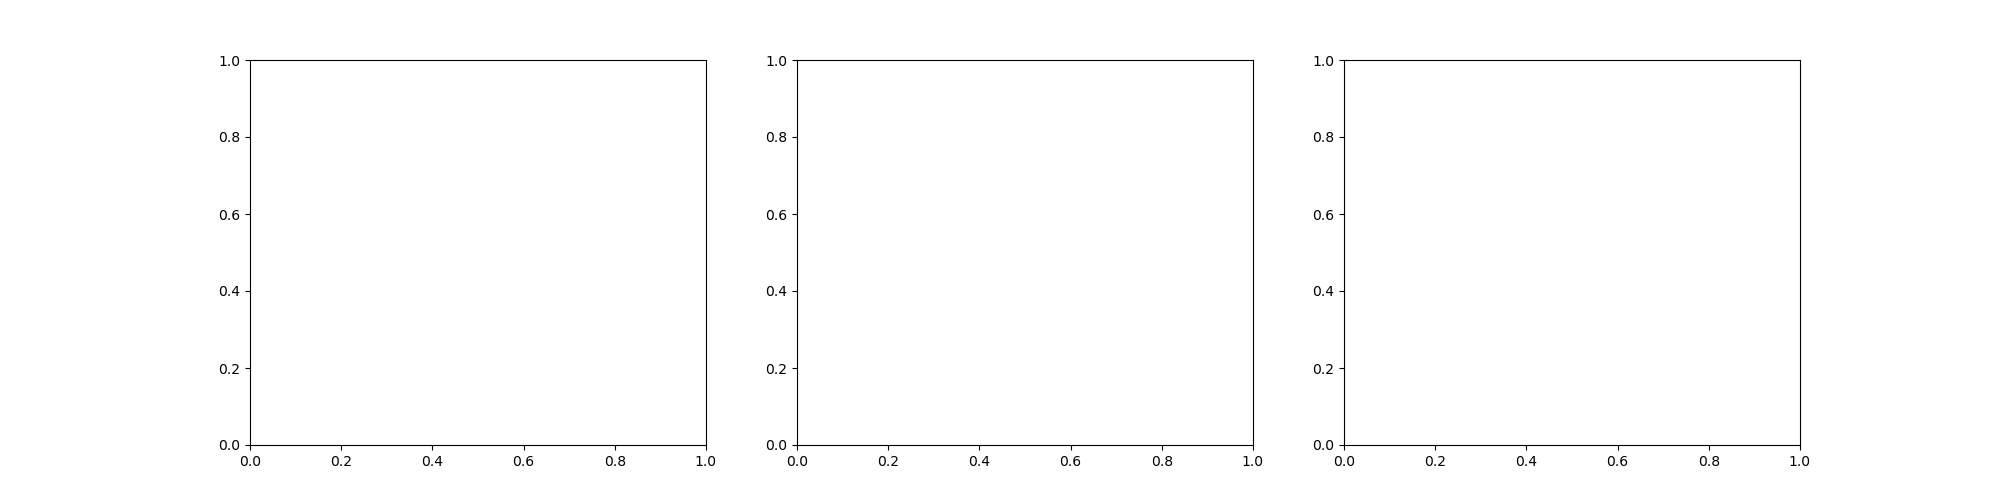

In [10]:
fig, axs = plt.subplots(1, 3, figsize=(20, 5))

group1 = ['GRB001', 'GRB002', 'GRB003', 'GRB004']
group2 = ['GRB005', 'GRB006', 'GRB007']
group3 = ['GRB015', 'GRB016', 'GRB017', 'GRB018']

# Define a list of colors for each group
colors1 = plt.cm.Blues(np.linspace(0.3, 1, len(group1)))
colors2 = plt.cm.Greens(np.linspace(0.3, 1, len(group2)))
colors3 = plt.cm.Reds(np.linspace(0.3, 1, len(group3)))

# Group 1: GRB001-GRB004
for i, animal in enumerate(group1):
    ses_performance_avg = group_performance_data[animal]['performance average']
    ses_median_waittime = median_wait_times[animal]
    if len(ses_median_waittime) == len(ses_performance_avg):
        axs[0].scatter(ses_median_waittime, ses_performance_avg, color=colors1[i], label=animal)
axs[0].set_xlabel('Median Wait Time')
axs[0].set_ylabel('Performance Average')
axs[0].legend(loc='upper left', bbox_to_anchor=(1,1))

# Group 2: GRB005-GRB007
for i, animal in enumerate(group2):
    ses_performance_avg = group_performance_data[animal]['performance average']
    ses_median_waittime = median_wait_times[animal]
    if len(ses_median_waittime) == len(ses_performance_avg):
        axs[1].scatter(ses_median_waittime, ses_performance_avg, color=colors2[i], label=animal)
axs[1].set_xlabel('Median Wait Time')
axs[1].set_ylabel('Performance Average')
axs[1].legend(loc='upper left', bbox_to_anchor=(1,1))

# Group 3: GRB015-GRB018
for i, animal in enumerate(group3):
    ses_performance_avg = group_performance_data[animal]['performance average']
    ses_median_waittime = median_wait_times[animal]
    if len(ses_median_waittime) == len(ses_performance_avg):
        axs[2].scatter(ses_median_waittime, ses_performance_avg, color=colors3[i], label=animal)
axs[2].set_xlabel('Median Wait Time')
axs[2].set_ylabel('Performance Average')
axs[2].legend(loc='upper left', bbox_to_anchor=(1,1))

plt.tight_layout()
plt.show()
# plt.savefig("/Users/gabriel/Library/CloudStorage/GoogleDrive-grojasbowe@gmail.com/My Drive/UCLA/ChurchlandLab/lab_meetings/figures/medianwaittime_vs_performance.pdf", format='pdf')


## Plot trial counts per session per cohort

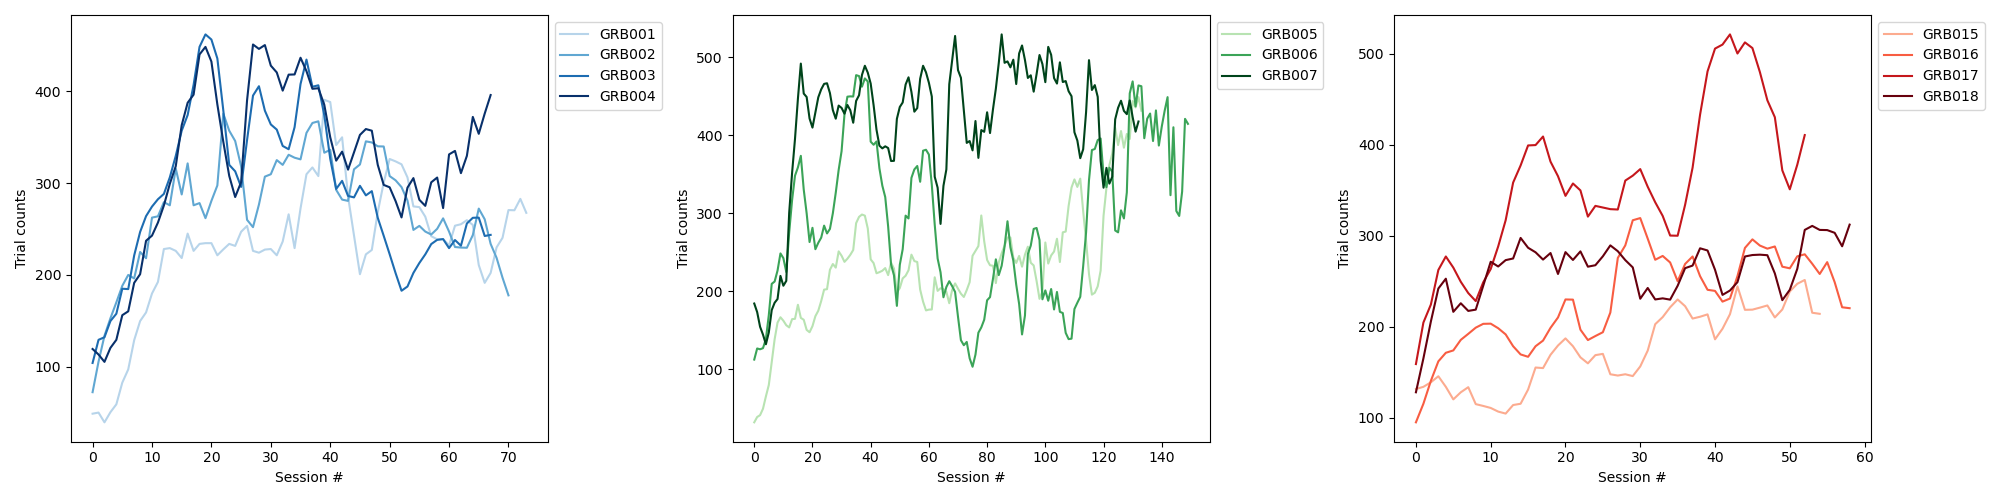

In [5]:
window_size = 5  #trials to smooth over

fig, axs = plt.subplots(1, 3, figsize=(20, 5))

# Group 1: GRB001-GRB004
for i, animal_name in enumerate(group1):
    trial_counts = session_trial_counts[animal_name]
    smoothed_counts = moving_average(trial_counts, window_size)
    axs[0].plot(smoothed_counts, color=colors1[i], label=animal_name)
axs[0].set_xlabel('Session #')
axs[0].set_ylabel('Trial counts')
axs[0].legend(loc='upper left', bbox_to_anchor=(1,1))

# Group 2: GRB005-GRB007
for i, animal_name in enumerate(group2):
    trial_counts = session_trial_counts[animal_name]
    smoothed_counts = moving_average(trial_counts, window_size)
    axs[1].plot(smoothed_counts, color=colors2[i], label=animal_name)
axs[1].set_xlabel('Session #')
axs[1].set_ylabel('Trial counts')
axs[1].legend(loc='upper left', bbox_to_anchor=(1,1))

# Group 3: GRB015-GRB018
for i, animal_name in enumerate(group3):
    trial_counts = session_trial_counts[animal_name]
    smoothed_counts = moving_average(trial_counts, window_size)
    axs[2].plot(smoothed_counts, color=colors3[i], label=animal_name)
axs[2].set_xlabel('Session #')
axs[2].set_ylabel('Trial counts')
axs[2].legend(loc='upper left', bbox_to_anchor=(1,1))

plt.tight_layout()
plt.show()


## Plot session performance on easy stimuli over days on top of the median wait times for those days

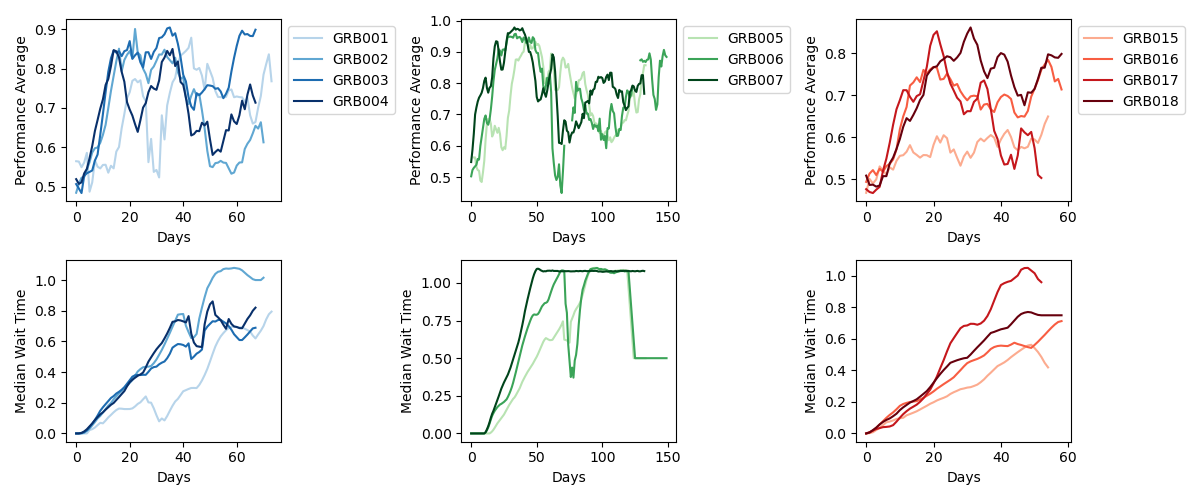

In [6]:
fig, axs = plt.subplots(2, 3, figsize=(12, 5))

window_size = 5  #trials to smooth over

# Group 1: GRB001-GRB004
for i, animal in enumerate(group1):
    ses_performance_avg = group_performance_data[animal]['performance average']
    smoothed_perf = moving_average(ses_performance_avg, window_size)
    axs[0,0].plot(smoothed_perf, color=colors1[i], label=animal)
axs[0,0].set_xlabel('Days')
axs[0,0].set_ylabel('Performance Average')
axs[0,0].legend(loc='upper left', bbox_to_anchor=(1,1))

# Group 2: GRB005-GRB007
for i, animal in enumerate(group2):
    ses_performance_avg = group_performance_data[animal]['performance average']
    smoothed_perf = moving_average(ses_performance_avg, window_size)
    axs[0,1].plot(smoothed_perf, color=colors2[i], label=animal)
axs[0,1].set_xlabel('Days')
axs[0,1].set_ylabel('Performance Average')
axs[0,1].legend(loc='upper left', bbox_to_anchor=(1,1))

# Group 3: GRB015-GRB018
for i, animal in enumerate(group3):
    ses_performance_avg = group_performance_data[animal]['performance average']
    smoothed_perf = moving_average(ses_performance_avg, window_size)
    axs[0,2].plot(smoothed_perf, color=colors3[i], label=animal)
axs[0,2].set_xlabel('Days')
axs[0,2].set_ylabel('Performance Average')
axs[0,2].legend(loc='upper left', bbox_to_anchor=(1,1))

#and now the same for the median wait time per session
for i, animal in enumerate(group1):
    ses_waittimes = median_wait_times[animal]
    smoothed_waittimes = moving_average(ses_waittimes, window_size)
    axs[1,0].plot(smoothed_waittimes, color=colors1[i], label=animal)
axs[1,0].set_xlabel('Days')
axs[1,0].set_ylabel('Median Wait Time')

for i, animal in enumerate(group2):
    ses_waittimes = median_wait_times[animal]
    smoothed_waittimes = moving_average(ses_waittimes, window_size)
    axs[1,1].plot(smoothed_waittimes, color=colors2[i], label=animal)
axs[1,1].set_xlabel('Days')
axs[1,1].set_ylabel('Median Wait Time')

for i, animal in enumerate(group3):
    ses_waittimes = median_wait_times[animal]
    smoothed_waittimes = moving_average(ses_waittimes, window_size)
    axs[1,2].plot(smoothed_waittimes, color=colors3[i], label=animal)
axs[1,2].set_xlabel('Days')
axs[1,2].set_ylabel('Median Wait Time')

plt.tight_layout()
plt.show()

## Get performance for all trials, concatenate them by animal, and store them in one dictionary

In [12]:
def get_all_trials_performance(animal_ids, file_names, min_stims=5):
    all_trials_all_animals = dict()
    for animal in animal_ids:
        trials_performance = np.array([])
        for file in file_names[animal]:
            session_data = pd.read_hdf(file)
            stim_rates = np.array([len(timestamps) for timestamps in session_data.stimulus_event_timestamps])
            unique_stims = list(np.unique(stim_rates))
            valid_trials = np.logical_or(stim_rates == 4, stim_rates == 20)
            if len(unique_stims)>=min_stims:
                #allocate performance
                performance = np.array(session_data.outcome_record, dtype=float)
                performance[performance == -1] = np.nan #setting early withdrawal trials as nans
                performance[performance == 2] = np.nan #setting no response trials as nans
                trials_performance = np.concatenate((trials_performance, performance[valid_trials]))
                trials_performance = trials_performance[~np.isnan(trials_performance)] #remove nans
        all_trials_all_animals[animal] = trials_performance

    return all_trials_all_animals

# animal_ids = ['GRB001', 'GRB002', 'GRB003', 'GRB004', 'GRB005', 'GRB006', 'GRB007', 'GRB008', 'GRB009', 'GRB015', 'GRB016', 'GRB017', 'GRB018']

all_trials_performance = get_all_trials_performance(['GRB006'], paths_all_animals, min_stims=1)

## Plot the performance for all trials for each animal and a cohort average interactively

interactive(children=(IntSlider(value=0, description='icohort', max=0), IntSlider(value=500, description='wind…

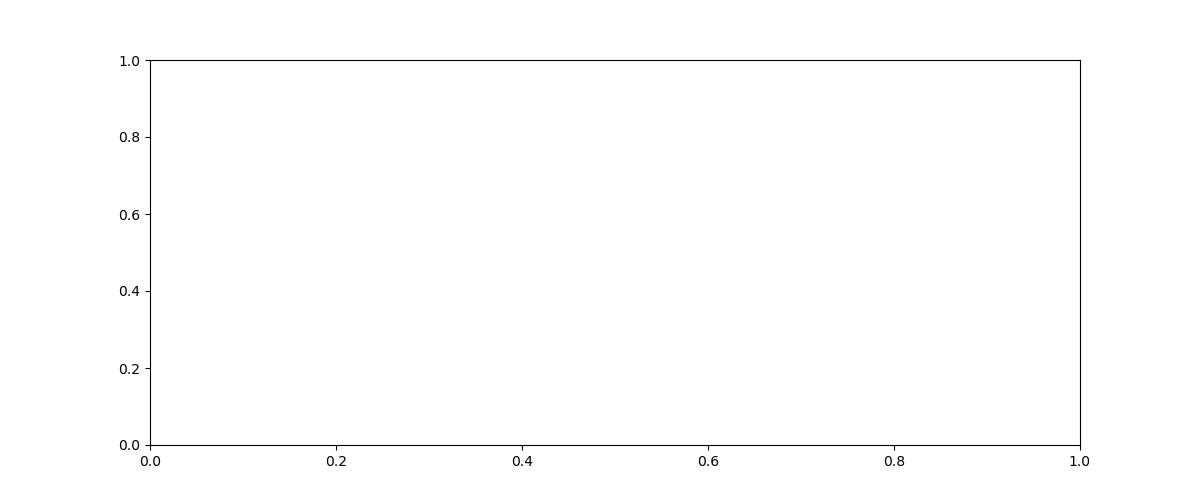

In [7]:
def separate_axes(ax): #thanks Lukas!
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    yti = ax.get_yticks()
    yti = yti[(yti >= ax.get_ylim()[0]) & (yti <= ax.get_ylim()[1]+10**-3)] #Add a small value to cover for some very tiny added values
    ax.spines['left'].set_bounds([yti[0], yti[-1]])
    xti = ax.get_xticks()
    xti = xti[(xti >= ax.get_xlim()[0]) & (xti <= ax.get_xlim()[1]+10**-3)]
    ax.spines['bottom'].set_bounds([xti[0], xti[-1]])

    return

from ipywidgets import interact, IntSlider #thanks Lillian!

fig, ax = plt.subplots(1, 1, figsize=(12, 5))

# first_cohort = ['GRB001', 'GRB002', 'GRB003', 'GRB004']
# second_cohort = ['GRB005', 'GRB006', 'GRB007']
second_cohort = ['GRB006']
# third_cohort = ['GRB015', 'GRB016', 'GRB017', 'GRB018']
# all = first_cohort + second_cohort + third_cohort

# cohorts = [first_cohort, second_cohort, third_cohort, all]
cohorts = [second_cohort]
@interact(icohort=IntSlider(min=0, max=len(cohorts)-1, step=1, value=0), window_size=IntSlider(min=10, max=1500, step=10, value=500), plot_avg=True)
def g(icohort, window_size, plot_avg):
    ax.clear()
    cohort = cohorts[icohort]
    filtered_cohort = {animal: all_trials_performance[animal] for animal in cohort}

    if plot_avg:
        #cutting to the minimum length for calculating the group average
        min_length = min([len(trials_performance) for animal, trials_performance in filtered_cohort.items()])
        for animal, trials_performance in filtered_cohort.items():
            filtered_cohort[animal] = trials_performance[:min_length]

        for animal, trials_performance in filtered_cohort.items():
            ax.plot(moving_average(trials_performance, window_size), alpha=0.35, label=animal)
        ax.plot(moving_average(np.array([trials_performance for animal, trials_performance in filtered_cohort.items()]).mean(axis=0), window_size), color='black', label='Average')
        ax.set_xlabel('Trials')
        ax.set_ylabel('Performance')
        ax.set_ylim(0.3, 1)
        ax.legend(loc='upper left', bbox_to_anchor=(1, 1))
    else:
        for animal, trials_performance in filtered_cohort.items():
            ax.plot(moving_average(trials_performance, window_size), alpha=0.8, label=animal)
        ax.set_xlabel('Trials')
        ax.set_ylabel('Performance')
        ax.set_ylim(0.3, 1)
        ax.legend(loc='upper left', bbox_to_anchor=(1, 1))

    separate_axes(ax)

    return


###OLD METHOD OF GENERATING THIS FIGURES ONE BY ONE###
#----------------------------------------------------#
# def plot_all_trials_performance(animals_to_plot, all_trials_performance, plot_avg=True, window_size=500):

#     all_trials_performance = {animal: all_trials_performance[animal] for animal in animals_to_plot}
#     # print(all_trials_performance.keys())
#     fig, ax = plt.subplots(1, 1, figsize=(12, 5))

#     if plot_avg:
#         #cutting to the minimum length for calculating the group average
#         min_length = min([len(trials_performance) for animal, trials_performance in all_trials_performance.items()])
#         for animal, trials_performance in all_trials_performance.items():
#             all_trials_performance[animal] = trials_performance[:min_length]

#         for animal, trials_performance in all_trials_performance.items():
#             ax.plot(moving_average(trials_performance, window_size), alpha=0.35, label=animal)
#         ax.plot(moving_average(np.array([trials_performance for animal, trials_performance in all_trials_performance.items()]).mean(axis=0), window_size), color='black', label='Average')
#         ax.set_xlabel('Trials')
#         ax.set_ylabel('Performance')
#         ax.set_ylim(0.4, 1)
#         ax.legend(loc='upper left', bbox_to_anchor=(1, 1))
#     else:
#         for animal, trials_performance in all_trials_performance.items():
#             ax.plot(moving_average(trials_performance, window_size), alpha=0.8, label=animal)
#         ax.set_xlabel('Trials')
#         ax.set_ylabel('Performance')
#         ax.set_ylim(0.4, 1)
#         ax.legend(loc='upper left', bbox_to_anchor=(1, 1))
    
#     return None

# #plot with no avg
# # plot_all_trials_performance(second_cohort, paths_all_animals, min_stims=1, plot_avg=False)
# # plot_all_trials_performance(third_cohort, paths_all_animals, min_stims=1, plot_avg=False)

# #plot with avg
# plot_all_trials_performance(third_cohort, all_trials_performance, plot_avg=True)
# # plot_all_trials_performance(third_cohort, paths_all_animals, plot_avg=True)

# plt.show()
# plt.tight_layout()

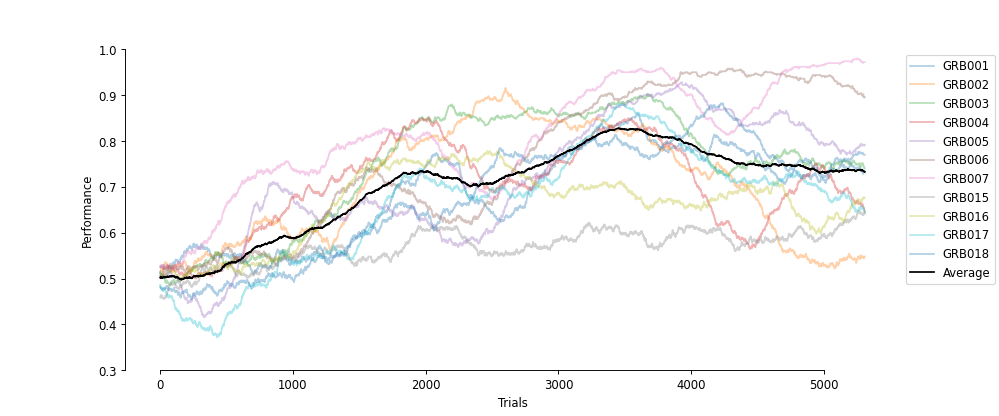

In [14]:
plt.show(4)
plt.savefig('/Users/gabriel/figures4kevin/performance_all_animals.pdf')

## Psychometric functions averaged over sessions

### Get the PMF results

In [8]:
def get_psychometric_results_all_animals(animal_ids):
    psychometric_results = dict()

    min_stim_opt = [2,4,5,6,8,10]
    stims_equal_opt = ['yes','no']

    for val in stims_equal_opt:
        if val == 'yes':
            stims_equal = True
        else:
            stims_equal = False

        for min_stim in min_stim_opt:
            if val not in psychometric_results: #initializing val (i.e. stims_equal bc python doesn't like me indexing a boolean) key if it doesn't exist yet
                psychometric_results[val] = {}
            if min_stim not in psychometric_results[val]: #initializing min_stim key if it doesn't exist yet
                psychometric_results[val][min_stim] = {}

            for animal in animal_ids:
                session_info = []
                all_stims = np.array([])
                all_choices = np.array([])
                session_files = paths_all_animals[animal]
                for session_file in session_files:
                    # all_stims = np.array([])
                    # all_choices = np.array([])
                    session_data = pd.read_hdf(session_file)
                    sel = session_data[session_data.response_side.isin([0,1])] # select only trials where the subject responded
                    responded_right = np.array(sel.response_side == 1).astype(int) # select the response = 1 (i.e. the left side) and cast to integer datatype (number)   
                    sel_stim_rates = sel.stimulus_event_timestamps.str.len()
                    unique_stim_rates = len(np.unique(sel_stim_rates))
                    if (stims_equal and unique_stim_rates == min_stim) or (not stims_equal and unique_stim_rates >= min_stim): #if stims equal is true, checks if the session has exactly the minimum # of stim rates. if false, checks that the session's # of stim rates are equal or more than the minimum
                        all_stims = np.concatenate((all_stims, sel_stim_rates))
                        all_choices = np.concatenate((all_choices, responded_right))
                        session_info.append((all_stims, all_choices))
                
                    if all_stims.size > 0:
                        res = fit_psychometric(all_stims.astype(float),all_choices.astype(float), min_required_stim_values=min_stim)
                    else:
                        res = None

                    psychometric_results[val][min_stim][animal] = res

                # res = fit_psychometric(all_stims.astype(float),all_choices.astype(float), min_required_stim_values=min_stim)

                # psychometric_results[val][min_stim][animal] = res

    return psychometric_results

# animal_ids = ['GRB001', 'GRB002', 'GRB003', 'GRB004', 'GRB005', 'GRB006', 'GRB007', 'GRB015', 'GRB016', 'GRB017', 'GRB018']

psychometric_results = get_psychometric_results_all_animals(animal_ids)


### Plot the PMFs

KeyError: 'GRB006'

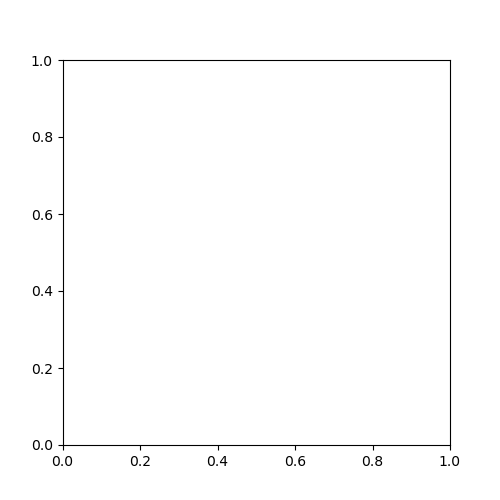

In [9]:
import matplotlib.cm as cm

# Create a new figure and axes
fig, ax = plt.subplots(figsize=(5, 5))

# Initialize lists to store fit parameters for all animals
all_fit_params = []

# Loop over all animals
for ianimal in range(len(animal_ids)):
    # Get the results for the current animal
    animal = animal_ids[ianimal]
    res = psychometric_results['no'][6][animal]

    # If there are no results, continue to the next animal
    if not res:
        continue

    # Plot the individual fits for the current animal
    nx = np.linspace(res['stims'].min(), res['stims'].max(), 100)
    ax.plot(nx, res['function'](*res['fit_params'], nx), linewidth=2, alpha=0.3)

    # Store the fit parameters
    all_fit_params.append(res['fit_params'])

# Calculate the average fit parameters
average_fit_params = np.mean(all_fit_params, axis=0)

# Plot the average line
nx = np.linspace(res['stims'].min(), res['stims'].max(), 100)
ax.plot(nx, res['function'](*average_fit_params, nx), linewidth=2, color='k')

# Set the labels and title
ax.set_ylabel('P$_{right}$', fontsize=18)
ax.set_xlabel('Stimulus rate (Hz)', fontsize=14)
ax.set_ylim([0,1])

# Show the plot
separate_axes(ax)
plt.show()
plt.tight_layout()

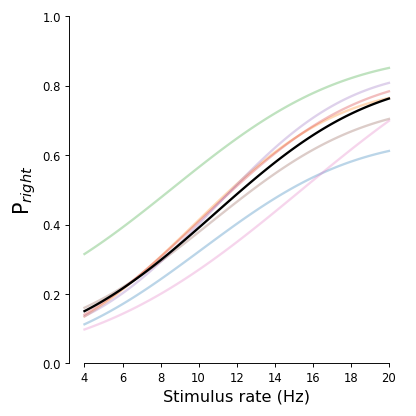

In [35]:
plt.show(21)
plt.savefig('/Users/gabriel/figures4kevin/pmf_all_animals.pdf')

### Plot the PMFs interactively animal by animal

interactive(children=(Checkbox(value=False, description='stims_equal'), IntSlider(value=6, description='ianima…

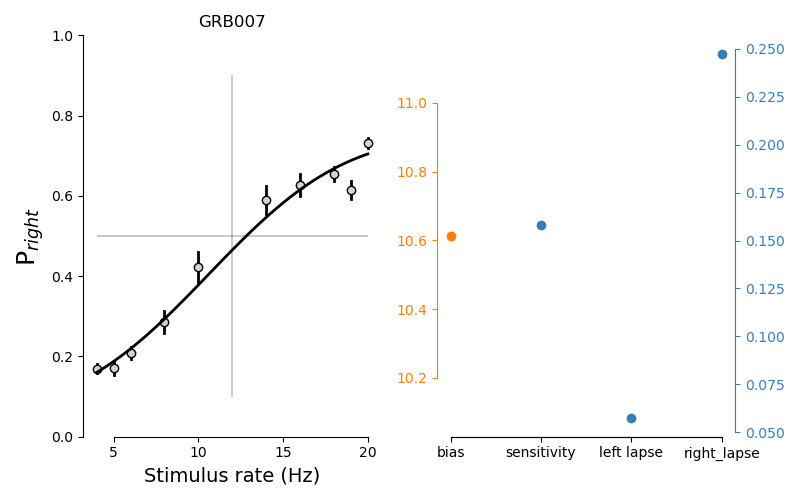

In [16]:
import seaborn as sns
from ipywidgets import interact, IntSlider, Dropdown #thanks Lillian!


def separate_twinx(ax): #thanks Lukas!
    ax.spines['top'].set_visible(False)
    ax.spines['left'].set_visible(False)
    yti = ax.get_yticks()
    yti = yti[(yti >= ax.get_ylim()[0]) & (yti <= ax.get_ylim()[1]+10**-3)] #Add a small value to cover for some very tiny added values
    ax.spines['right'].set_bounds([yti[0], yti[-1]])
    xti = ax.get_xticks()
    xti = xti[(xti >= ax.get_xlim()[0]) & (xti <= ax.get_xlim()[1]+10**-3)]
    ax.spines['bottom'].set_bounds([xti[0], xti[-1]])

    return


fig, axs = plt.subplots(1, 2, figsize=(8, 5))
twinx_ax1 = axs[1].twinx()


@interact(ianimal=IntSlider(min=0, max=len(animal_ids)-1, step=1, value=6), 
          min_stims=Dropdown(options=[2,4,5,6,8,10],value=6,description='Minimum stimuli presented:'), 
          stims_equal=False)
def p(stims_equal, ianimal, min_stims):
    axs[0].clear()
    axs[1].clear()
    twinx_ax1.clear()

    animal = animal_ids[ianimal]
    if stims_equal == True:
        stimsequal = 'yes'
    else:
        stimsequal = 'no'
        
    res = psychometric_results[stimsequal][min_stims][animal]

    if not res:
        axs[0].text(0.5, 0.5, 'No data available', horizontalalignment='center', verticalalignment='center', transform=axs[0].transAxes, fontsize=20)
        axs[0].set_title(animal)
    else:
        for s,c in zip(res['stims'],res['p_side_ci']):
            axs[0].plot(s*np.array([1,1]),c, linestyle='-', linewidth=2, color='k')
        axs[0].plot(res['stims'],res['p_side'],'o',markerfacecolor = 'lightgray',markersize = 6, color='k')

        nx = np.linspace(res['stims'].min(),res['stims'].max(),100)
        axs[0].plot(nx,res['function'](*res['fit_params'],nx), linewidth=2, color='k')
        axs[0].set_ylabel('P$_{right}$',fontsize = 18)  # set the y-axis label with latex nomenclature
        axs[0].set_xlabel('Stimulus rate (Hz)', fontsize = 14); # set the x-axis label
        axs[0].set_ylim(0, 1)
        axs[0].set_title(animal)
        axs[0].vlines(12,0.1,0.9,color = 'k',lw = 0.3)
        axs[0].hlines(0.5,np.min(res['stims']),np.max(res['stims']),color = 'k',lw = 0.3)

        #now plot the bias
        # twinx_ax2 = axs[1].twinx()
        # sns.scatterplot(ax=axs[1], data=res['fit_params'][:1], color='k')
        # sns.scatterplot(ax=twinx_ax1, data=res['fit_params'][1:4], color='k')
        # axs[1].set_xticks([0,1,2,3], labels = ['bias', 'sensitivity', 'left lapse', 'right_lapse'])
        # # axs[1].set_xlabel()
        axs[1].scatter(0, res['fit_params'][0], color='#ff7f00') #orange colorblind friendly

        for i in range(1, 4):
            twinx_ax1.scatter([i], res['fit_params'][i], color='#377eb8') #blue colorblind friendly

        axs[1].set_xticks([0,1,2,3])
        axs[1].set_xticklabels(['bias', 'sensitivity', 'left lapse', 'right_lapse'])

        axs[1].spines['left'].set_color('#ff7f00')
        axs[1].tick_params(axis = 'y', color='#ff7f00', which='both', labelcolor='#ff7f00')
        # axs[1].yaxis.set_label_text(color='#ff7f00')
        # axs[1].set_yticklabels(color='red')

        twinx_ax1.spines['right'].set_color('#377eb8')
        twinx_ax1.tick_params(axis = 'y', color='#377eb8', which='both', labelcolor='#377eb8')
        twinx_ax1.yaxis.label.set_color('#377eb8')

    for ax in axs:
        separate_axes(ax)
    separate_twinx(twinx_ax1)

    plt.tight_layout()

    return

#colorblind friendly palette for later use
# colors = {
#     'blue':    '#377eb8', 
#     'orange':  '#ff7f00',
#     'green':   '#4daf4a',
#     'pink':    '#f781bf',
#     'brown':   '#a65628',
#     'purple':  '#984ea3',
#     'gray':    '#999999',
#     'red':     '#e41a1c',
#     'yellow':  '#dede00'
# } 


## Response time and performance comparisons in single sessions

In [36]:
def get_perf_and_response_time_all_animals(animal_ids):
    performance = {}
    response_times = {}

    for animal in animal_ids:
        performance[animal] = {}
        response_times[animal] = {}
        session_files = paths_all_animals[animal]
        for session_file in session_files:
            split_path = session_file.split('/')
            date = split_path[5]
            session_data = pd.read_hdf(session_file)
            sel = session_data[session_data.response_side.isin([0,1])] # select only trials where the subject responded
            responded_right = np.array(sel.response_side == 1).astype(int) # select the response = 1 (i.e. the right side) and cast to integer datatype (number)   
            sel_stim_rates = sel.stimulus_event_timestamps.str.len()
            response_period = np.zeros((len(session_data), 2))
            # response_period[:, 0] = [trial[1] for trial in session_data.DemonWaitForWithdrawalFromCenter]
            response_period[:, 0] = [trial[1]+1 for trial in session_data.PlayStimulus]
            response_period[:, 1] = [trial[1] for trial in session_data.DemonWaitForResponse]
            
            if date not in performance[animal]:
                performance[animal][date] = {'stims': sel_stim_rates, 'choices': responded_right}
                response_times[animal][date] = [np.diff(trial) for trial in response_period if not np.isnan(trial[0]) and not np.isnan(trial[1])]
            else:
                performance[animal][date]['stims'] = np.concatenate((performance[animal][date]['stims'], sel_stim_rates))
                performance[animal][date]['choices'] = np.concatenate((performance[animal][date]['choices'], responded_right))



    return performance, response_times

performance, response_times = get_perf_and_response_time_all_animals(animal_ids)

interactive(children=(IntSlider(value=5, description='animal', max=10), IntSlider(value=153, description='date…

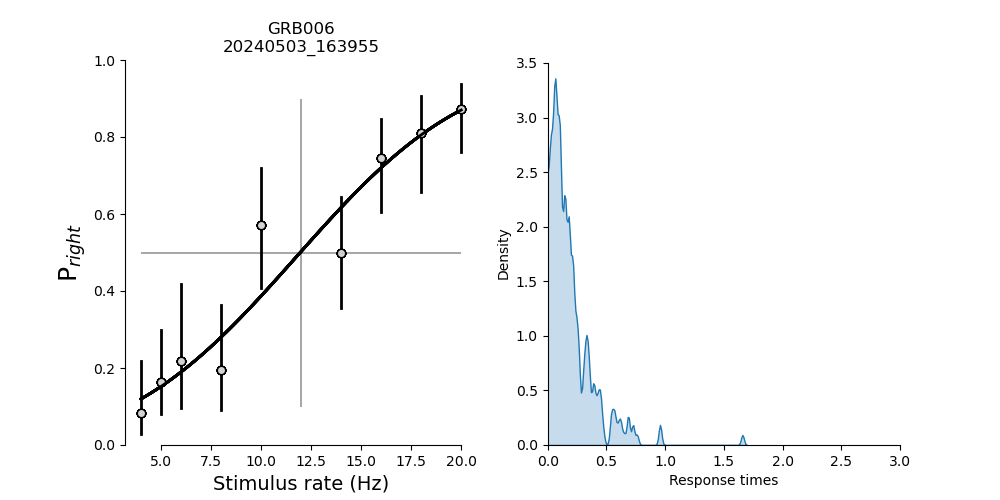

In [37]:
from ipywidgets import interact, IntSlider

fig, ax = plt.subplots(1, 2, figsize=(10, 5))

animal_slider = IntSlider(min=0, max=len(animal_ids)-1, step=1, value=5, description='animal')
date_slider = IntSlider(description='date')

def update_date_range(*args): #this is needed because each animal has a unique number of sessions so the values in the date slider have to change dynamically
    max_date = len(performance[animal_ids[animal_slider.value]])-1
    date_slider.max = max_date
    date_slider.value = max_date  #set the initial value to the last session for practical purposes

animal_slider.observe(update_date_range, 'value') #this makes sure that the date slider is updated anytime the animal slider changes
update_date_range() #called once just to make sure the range is correct when the sliders are initialized for the first animal since the date slider is only updated when the animal slider changes

@interact(ianimal=animal_slider, session_date=date_slider, minstims=IntSlider(min=2, max=12, step=1, value=6))
def h(ianimal, session_date, minstims):
    animal = animal_ids[ianimal]
    dates = list(performance[animal].keys())
    date = dates[session_date]
    allstims = performance[animal][date]['stims']
    allchoices = performance[animal][date]['choices']
    res = fit_psychometric(allstims.astype(float),allchoices.astype(float), min_required_stim_values=minstims)
    try:
        ax[0].clear()
        ax[1].clear()
        for s,c in zip(res['stims'],res['p_side_ci']):
            ax[0].plot(s*np.array([1,1]),c, linestyle='-', linewidth=2, color='k')
            ax[0].plot(res['stims'],res['p_side'],'o',markerfacecolor = 'lightgray',markersize = 6, color='k')

            nx = np.linspace(res['stims'].min(),res['stims'].max(),100)
            ax[0].plot(nx,res['function'](*res['fit_params'],nx), linewidth=2, color='k')
            ax[0].set_ylabel('P$_{right}$',fontsize = 18)  # set the y-axis label with latex nomenclature
            ax[0].set_xlabel('Stimulus rate (Hz)', fontsize = 14); # set the x-axis label
            ax[0].set_ylim(0, 1)
            ax[0].set_title(f'{animal}\n{date}')
            ax[0].vlines(12,0.1,0.9,color = 'k',lw = 0.3, alpha=0.2)
            ax[0].hlines(0.5,np.min(res['stims']),np.max(res['stims']),color = 'k',lw = 0.3, alpha=0.2)

        #now plot the response times
        sns.kdeplot(ax=ax[1], data=np.array(response_times[animal][date]), fill=True, bw_adjust = 0.2, label='Response times')
        ax[1].set_xlabel('Response times')
        ax[1].set_ylabel('Density')
        ax[1].set_xlim([0,3])
        ax[1].legend().remove()

    except Exception as e:
        ax[0].clear()
        ax[1].clear()

        ax[0].text(0.5, 0.5, 'No data available', horizontalalignment='center', verticalalignment='center', transform=ax[0].transAxes, fontsize=20)
        ax[0].set_title(animal)   

    separate_axes(ax[0])
    separate_axes(ax[1])

In [ ]:
# rt = np.array(response_times['GRB005']['20240325_103312'])
# # rt = rt[rt < 5] #removing trials with response times higher than 5 seconds
# fig, ax = plt.subplots(1, 1, figsize=(10, 5))
# sns.histplot(rt, bins=50, kde=True, ax=ax)
# ax.set_xlabel('Response time (s)')
# ax.set_ylabel('Count')
# separate_axes(ax)
# plt.show()

#now the GRB006 session
rt = np.array(response_times['GRB006']['20240325_115618'])
rt = rt[rt < 1] #removing trials with response times higher than 5 seconds
fig, ax = plt.subplots(1, 1, figsize=(10, 5))
sns.histplot(rt, bins=50, kde=True, ax=ax)
ax.set_xlabel('Response time (s)')
ax.set_ylabel('Count')
# separate_axes(ax)
plt.show()

## Look at relationship between session performance and average gap time (stim offset -> choice reporting)

In [ ]:
def get_session_gap_and_performances(animal_ids, file_names, min_stims=5):
    gap_and_performance = {animal_id: {'ses_avg': {}, 'ses_gap': {}} for animal_id in animal_ids}

    for animal in animal_ids:    

        session_averages = []
        session_gap_times = []

        for file in file_names[animal]:
            session_data = pd.read_hdf(file)
            stim_rates = np.array([len(timestamps) for timestamps in session_data.stimulus_event_timestamps])
            unique_stims = list(np.unique(stim_rates))
            valid_trials = np.logical_or(stim_rates == 4, stim_rates == 20)
            if len(unique_stims)>min_stims:
                #allocate performance
                performance = np.array(session_data.outcome_record, dtype=float)
                performance[performance == -1] = np.nan #setting early withdrawal trials as nans
                performance[performance == 2] = np.nan #setting no response trials as nans
                session_averages.append(np.nanmean(performance[valid_trials])) #filtered for taking into consideration easy trials only

                outcome_mask = session_data['outcome_record'].isin([0, 1])
                outcome = session_data['outcome_record'][valid_trials]
                response_occurs = np.array([item[1] for item in session_data['DemonWaitForResponse'][outcome_mask]])
                stim_offset = np.array([item[0]+1 for item in session_data['PlayStimulus'][outcome_mask]])
                gap_time = np.nanmean(response_occurs)-np.nanmean(stim_offset)
                session_gap_times.append(gap_time)

        gap_and_performance[animal]['ses_avg'] = session_averages
        gap_and_performance[animal]['ses_gap'] = session_gap_times

    return gap_and_performance

gap_and_performance = get_session_gap_and_performances(animal_ids, paths_all_animals, min_stims=1)

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(10, 5))

# Create a ScalarMappable for the colorbar
sm = plt.cm.ScalarMappable(cmap='viridis')
sm.set_array([])

# Create the colorbar
cbar = fig.colorbar(sm, ax=ax, label='Sessions')

@interact(ianimal=IntSlider(min=0, max=len(animal_ids)-1, step=1, value=0))
def gap_viewer(ianimal):
    ax.clear()
    animal = animal_ids[ianimal]
    sessions = np.arange(len(gap_and_performance[animal]['ses_gap'])) #create an array of session numbers
    gap_colors = plt.cm.viridis(sessions / sessions.max()) #recalculate the colors depending on the session count

    ax.scatter(gap_and_performance[animal]['ses_gap'], gap_and_performance[animal]['ses_avg'], color=gap_colors)
    ax.set_xlabel('Gap time')
    ax.set_ylabel('Performance')
    ax.set_title(animal)
    ax.set_xlim(right=4)
    ax.vlines(0,0,1, color='k', alpha=0.3)
    ax.hlines(0.5, xmin=ax.get_xlim()[0], xmax=ax.get_xlim()[1], color='k', alpha=0.3)
    sm.set_clim(vmin=0, vmax=sessions.max()) #update the sm scale
    cbar.update_normal(sm)
    cbar.set_ticks([0, np.floor(np.median(sessions)), sessions.max()])

    separate_axes(ax)
    # plt.show()

## 